In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Why invest in portfolios

As an investor you can choose to invest in a single stock, or in a portfolio of stocks. What are valid reasons for choosing to invest in a portfolio of stocks?

## Possible Answers


    A portfolio will always generate a higher return versus a single stock investment.
    
    
    A portfolio is always less risky compared to a single stock.
    
    
    A portfolio, if selected properly, is less vulnerable to extreme highs and lows, and provides the benefits of diversification. {Answer}

**When combining stocks that balance each other out in terms of risk, you can protect your investment against large peaks and troughs. That is called diversification and typically happens in well selected portfolios.**

In [13]:
import pandas as pd
stock_returns = pd.read_csv(path_data+'stock_returns.csv', parse_dates=['date'], index_col='date')
stock_returns.head()

,GE,JPM,MSFT,PG,portfolio
date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.963288,0.937910,0.981394,0.990491,0.968271
2015-01-06,0.920990,0.887662,0.952524,0.981424,0.935499
2015-01-07,0.921788,0.890542,0.977331,0.991818,0.945125
2015-01-08,0.944932,0.932789,1.035500,1.014595,0.981714


In [16]:
import matplotlib.pyplot as plt
import matplotlib

def plot_pct_returns(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df.MSFT, marker='', color='green', linewidth=2, label="MSFT")
    ax.plot(df.index, df.portfolio, linewidth=2, linestyle='dashed', color='skyblue', label='portfolio')
    ax.plot(df.index, df.PG, marker='', color='pink', linewidth=2, label="PG")
    ax.plot(df.index, df.JPM, color='yellow', linewidth=2, label='JPM')
    ax.plot(df.index, df.GE, color='red', linewidth=2, label='GE')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    #ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
    #ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend()
    plt.show()

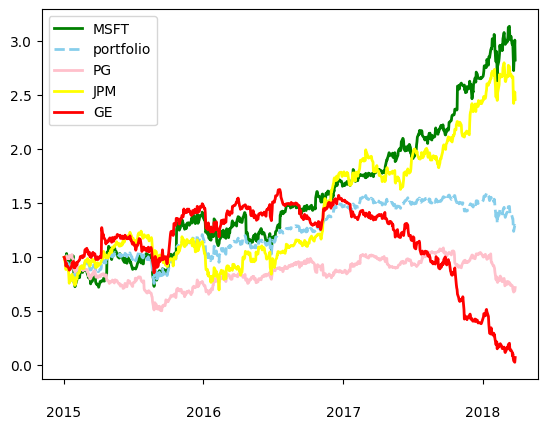

'\nCorrect: all the weights of the stocks in the portfolio are equal, hence we are looking at an equal weighted portfolio.\n'

In [17]:
# exercise 01

"""
The effect of diversification

In this exercise you're going to compare performance of four individual stocks, to a portfolio of the same four stocks. You'll see that 2 out of the four stocks will under-perform over a time period of roughly four years, and two will perform quite well.

The stocks you're going to investigate are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let's play a little game: pick one stock to invest in, then, let's see how it would have performed over time. There's a 50-50 chance that you'll pick a winning stock, versus a losing stock. Let's look at the data and see whether your stock is one of strong performers.

Available is a data set called stock_returns containing the cumulative returns of these four stocks over time, plus a portfolio of these stocks.
"""

# Instructions

"""

    Inspect the data stored under stock_returns. Check for which time period we have data on the stocks in the dataset by using the commands .head() and .tail().
---

    For the moment of truth: plot the cumulative returns of the stocks using the function plot_pct_returns(). Did you pick a winning stock?
---
Question

The portfolio returns in your dataset are from a portfolio containing these four stocks: General Electric, JP Morgan, Microsoft and Proctor & Gamble. The weights that were used to calculate the portfolio returns over time are [0.25, 0.25, 0,25, 0,25]. What kind of portfolio is this?
Possible answers:
    
    A market capitalization (market-cap) weighted portfolio
    
    An equal weighted portfolio {Answer}
    
    A random portfolio
    
    I don't have enough information to answer this
"""

# solution

# Check beginning and end of dataset
stock_returns.head()
stock_returns.tail()

# Plot percentage returns
plot_pct_returns(stock_returns)

#----------------------------------#

# Conclusion

"""
Correct: all the weights of the stocks in the portfolio are equal, hence we are looking at an equal weighted portfolio.
"""

In [19]:
# exercise 02

"""
Portfolio losses and gaining it back

First, let's develop our intuition for returns. Did you know that when your portfolio copes with losses, it takes a lot of time to get back to the original level of wealth? Because we are dealing with percentage increases and decreases, these changes are not linear in magnitude. Suppose you invest $1000 on day 1 in a portfolio, and it loses 50% in that first day. So that means on day 2, you start with a portfolio value of $500.

So after a loss of 50%, what should the percentage return on day 2 be to get back to the initial investment value of $1000? Use the console to check your answer.
"""

# Instructions

"""
Possible answers:
    
    50%
    
    75%
    
    100% {Answer}
    
    200%
"""

# solution


#----------------------------------#

# Conclusion

"""
Correct! After 50% loss you would need to double the amount of money you have remaining to return to your initial investment value.
"""

'\nCorrect! After 50% loss you would need to double the amount of money you have remaining to return to your initial investment value.\n'

In [20]:
data = pd.read_csv(path_data+'small_portfolio.csv', parse_dates=['date'], index_col='date')
data.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [23]:
# exercise 03

"""
Calculate mean returns

In this exercise, you're going to calculate performance for a four stock portfolio over the period January 2015 through March 2019. The portfolio consists of Proctor & Gamble, Microsoft, JP Morgan and General Electric stocks. You'll discover that multiplying the mean return of each stock with its portfolio weight, is a very quick and straightforward way to calculate portfolio performance over a given period of time.

The four columns in the DataFrame data contain the prices of these four stocks mentioned above. Have a look at data by inspecting it in the console.
"""

# Instructions

"""

    
    Calculate the percentage returns of the stocks in the DataFrame data by comparing today's price with yesterday's price.
    
    Calculate the mean returns of each stock in the new returns DataFrame.
    
    Assign the weights of the stocks to the weights array. The weights are 0.5, 0.2, 0.2 and 0.1.
    
    Multiply the percentage returns with the weights, and take the total sum, to calculate the total portfolio performance and print the results.

"""
import numpy as np
# solution

# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(weights*meanDailyReturns)

# Print the portfolio return
print(portReturn)

#----------------------------------#

# Conclusion

"""
Great work! You see that with just a few lines of code you can easily calculate portfolio performance. In the next chapter, you'll discover alternative measures of performance, apart from the geometric mean, that you can use to indicate a portfolio's performance over a given period of time, and even compare performance over different lengths of time.
"""

-1.6782226618545438e-05


"\nGreat work! You see that with just a few lines of code you can easily calculate portfolio performance. In the next chapter, you'll discover alternative measures of performance, apart from the geometric mean, that you can use to indicate a portfolio's performance over a given period of time, and even compare performance over different lengths of time.\n"

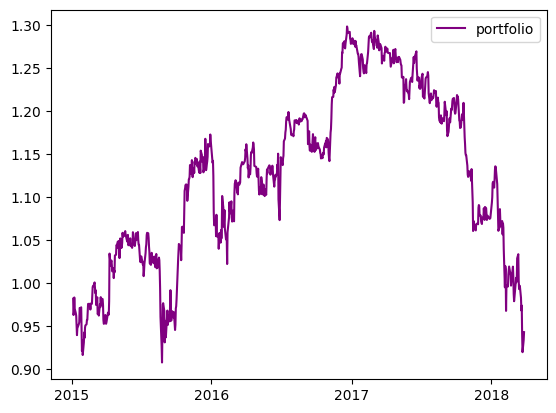

"\nGreat work! Now you've seen how to calculate mean performance over time, as well as cumulative performance over time. The plot you've created allows you to investigate when the portfolio was performing well, and when things weren't going so well. In the next, you'll create some more intuition about performance.\n"

In [25]:
# exercise 04

"""
Portfolio cumulative returns

In the previous exercise, you've calculated the mean performance over a period of time. This gives you one performance number for that entire period. But what if you would want to plot the development of the performance over time? For that, you will need the cumulative performance, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

Remember because of the compounding effect, you need to use cumprod() for this calculation. NumPy has already been imported as np and available are the daily returns data from the previous exercise under returns. Let's give it a try!
"""

# Instructions

"""

    Calculate the daily portfolio returns and assign it to a new column called ['Portfolio'] in the returns dataset. Use dot multiplication to multiply the returns data with the portfolio weights.
---

    Transform the daily returns dataset to a cumulative returns dataset by using the cumprod() function. Inspect what the data looks like by looking at the tail of the dataset.
---

    Plot the daily_cum_ret.index, which contains the dates, against the cumulative portfolio returns data, stored under daily_cum_ret.Portfolio. Inspect the plot. Do you know how to interpret this plot?

"""

# solution

# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! Now you've seen how to calculate mean performance over time, as well as cumulative performance over time. The plot you've created allows you to investigate when the portfolio was performing well, and when things weren't going so well. In the next, you'll create some more intuition about performance.
"""

In [28]:
# exercise 05

"""
Portfolio variance

Your turn! It's time to calculate the risk of our 4-stock portfolio. Let's start with the pricing data, available under data. You'll have to calculate daily percentage returns and assign weights to your portfolio. You'll then continue by calculating the covariance matrix, and use the following formula: Portfolio variance = Weights transposed x (Covariance matrix x Weights) to get the final portfolio variance.

As calculating portfolio variance is an important part of portfolio analysis, make sure you take your time to understand each step, and go back to the slides if you need to. Good luck!
"""

# Instructions

"""

    Calculate the daily returns from the price data and create a NumPy array with the following portfolio weights: 0.05, 0.4, 0.3, 0.25.
---

    Create the covariance matrix from the daily_returns data. The multiplication with 250 is to account for 250 trading days in a year. Inspect the covariance matrix and make sure you understand the elements within it.
---

    Using the NumPy dot product function, apply the formula: Portfolio variance = Weights transposed x (Covariance matrix x Weights) on the weights and cov_matrix to calculate the portfolio variance. Print the portfolio variance.
---
Question

Looking at our covariance matrix cov_matrix, which stock in our portfolio has the highest risk? Print it in the console if you need to have another look at it.
Possible answers:

    JP Morgan is the riskiest stock, since it is a financial company

    JP Morgan is the riskiest, since it has relatively high correlations with the the stocks.

    Microsoft is the riskiest, since it's variance is 5.4%, which is the highest of all the stocks in the portfolio {Answer}

    I can't say based on the information in the covariance matrix.
"""

# solution

# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*250

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')
print(cov_matrix)

#----------------------------------#

# Conclusion

"""
Correct: the variances of the stocks are in the diagonal of the covariance matrix. The variance tell us how much the returns of individual stocks deviate from their mean. Microsoft seems to have relatively the highest variance of them all.
"""

2.55%
            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


'\nCorrect: the variances of the stocks are in the diagonal of the covariance matrix. The variance tell us how much the returns of individual stocks deviate from their mean. Microsoft seems to have relatively the highest variance of them all.\n'

In [29]:
# exercise 06

"""
Standard deviation versus variance

Let's talk about the difference between variance and standard deviation. From the video you already know that the standard deviation

is simply the square root of the variance. Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other?

In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

Let's calculate the standard deviation. Available are the weights and the cov_matrix from the previous exercise.
"""

# Instructions

"""

    Re-create the calculation of the portfolio variance using weights and the cov_matrix. This time, take the square root of the whole calculation, to obtain the standard deviation instead.
    
    Print the standard deviation, the same way we did for the portfolio variance.

"""

# solution

# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

#----------------------------------#

# Conclusion

"""
Good job! The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. If a portfolio has a 12% average rate of return and a standard deviation of 4%, its return will range from 8-16%. The mean historic return of this particular portfolio is actually close to zero. With an average standard deviation of roughly 16%, this means you're getting a bad deal here! Now that you've learned how to calculate basic risk and return of a portfolio, you're ready to dive deeper into the world of portfolio analysis in the next chapters.
"""

15.959999999999999%


"\nGood job! The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. If a portfolio has a 12% average rate of return and a standard deviation of 4%, its return will range from 8-16%. The mean historic return of this particular portfolio is actually close to zero. With an average standard deviation of roughly 16%, this means you're getting a bad deal here! Now that you've learned how to calculate basic risk and return of a portfolio, you're ready to dive deeper into the world of portfolio analysis in the next chapters.\n"